# Project 3 - Clustering Group J
## Hotel customer segmentation

This project is a result of a university based group project, therefore the following is a personal version of the work.

## Dataset description

Please check the following URL for information about the dataset structure and content: https://www.sciencedirect.com/science/article/pii/S2352340920314645

## Work description

#### Introduction
<p>Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing. Like most hotels, hotel H , a hotel located in Lisbon, Portugal, member of the independent hotel chain C, uses a hospitality standard market segmentation based on the origin of the customer. However, A, the new marketing manager of hotel H, recognized that this type of segmentation, as is today well-known, is not useful for the hotel marketing department.</p>

#### Customer segmentation in hotel H
<p>Until 2015 hotel chain C operated 4 hotels, however, with the acquisition of new hotels, the hotel chain board decided to invest more in marketing. However, it was not until 2018 that the hotel chain created a marketing department and hired a new marketing manager, A. A realized that the current customer segmentation was not adequate, as it only reflected one only customer characteristic, its sales origin. It did not reflect geographic characteristics, such as the country of origin, demographic characteristics such as age, or behavioral characteristics such as the number of stays.</p>
<p>Without a proper customer segmentation, is difficult for A to define a strategy to reach new customers and to continue to captivate the current customers. In particular, taking into consideration the multiple distribution channels that hotels operate nowadays (travel agencies, travel operators, online travel agencies - OTA, brand website, meta searchers websites, among others). For example, corporate customers tend to make reservations very near arrival date, book directly with the hotel, and be willing to pay more for a better equipped room, while a customer on holidays tend to make reservations more distant of the arrival date, book with a travel operator or OTA, and to look for better price opportunities. Therefore, products “creation”, pricing definitions, and other marketing tasks, such as advertising, must take into consideration the targets of its efforts, according to the different channels and groups of customers.</p>

#### The challenge
<p>Instead of applying on the traditional hospitality segmentation to divide customers into groups, the challenge proposed by A to the hotel chain marketing department team is to create a more up-to-date, data-driven, customer segmentation based on the hotel H’s customer database.</p>

# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [0 - Executive Summary](#summary)
    * [0.1 - Approach summary](#approach)
    * [0.2 - Clustering results](#results)
* [1 - Data Import & exploration](#imp_exp)
    * [1.1 - Imports](#imp)
    * [1.2 - Exploration + Visuals](#exp)
    * [1.3 - Correlations](#corr)
* [2 - Data Prepartion](#prep)
    * [2.1 - Transformations](#transformation)
    * [2.2 - Outliers](#outliers)
* [3 - Feature selection + engineering](#features)
* [4 - Models + evaluations](#models)

# <font color='#BFD72F'>0 - Executive Summary</font> <a class="anchor" id="summary"></a>

## <font color='#BFD72F'>0.1 - Approach summary</font> <a class="anchor" id="approach"></a>

Insert summary here

## <font color='#BFD72F'>0.2 - Clustering results</font> <a class="anchor" id="results"></a>


Insert clustering results here

# <font color='#BFD72F'>1 - Data Import & exploration</font> <a class="anchor" id="imp_exp"></a>

## <font color='#BFD72F'>1.1 - Imports</font> <a class="anchor" id="imp"></a>

In [118]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

#Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

#Visuals
import seaborn as sns
from matplotlib import pyplot as plt
from ipywidgets import interact, interact_manual
import plotly.express as px


from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import QuantileTransformer, MinMaxScaler

from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance



In [2]:
# Loading the dataset and visualizing top rows
ds = pd.read_csv('HotelCustomersDataset.tsv', sep="\t")
ds.head()

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
1   2         PRT   NaN               1095   
2   3         DEU  31.0               1095   
3   4         FRA  60.0               1095   
4   5         FRA  51.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
1  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   
3  0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...               93   
4  0xE175754CF77247B202DD0820F49407C762C14A603B3A...                0   

   LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0           371.0         105.3                 1  ...              0   
1           280.0          53.0                 0  ...              0   
2             0.0           0.0                 0  ...              0   
3           240.0          60.0                 0  ...              0   
4             0.0           0.0                 0  ...              0   

   SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
0          0         0       0              0          0              0   
1          0         0       0              0          0              0   
2          0         0       0              0          0              0   
3          0         0       0              0          0              0   
4          0         0       0              0          0              0   

  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                  0                     0            0  
1                  0                     0            0  
2                  0                     0            0  
3                  0                     0            0  
4                  0                     0            0  

[5 rows x 31 columns]

In [3]:
#Info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

## <font color='#BFD72F'>1.2 - Exploration</font> <a class="anchor" id="exp"></a>

In [4]:
#Summary statistics
ds.describe(include='all').T

count unique  \
ID                    83590.0    NaN   
Nationality             83590    188   
Age                   79811.0    NaN   
DaysSinceCreation     83590.0    NaN   
NameHash                83590  80642   
DocIDHash               83590  76993   
AverageLeadTime       83590.0    NaN   
LodgingRevenue        83590.0    NaN   
OtherRevenue          83590.0    NaN   
BookingsCanceled      83590.0    NaN   
BookingsNoShowed      83590.0    NaN   
BookingsCheckedIn     83590.0    NaN   
PersonsNights         83590.0    NaN   
RoomNights            83590.0    NaN   
DaysSinceLastStay     83590.0    NaN   
DaysSinceFirstStay    83590.0    NaN   
DistributionChannel     83590      4   
MarketSegment           83590      7   
SRHighFloor           83590.0    NaN   
SRLowFloor            83590.0    NaN   
SRAccessibleRoom      83590.0    NaN   
SRMediumFloor         83590.0    NaN   
SRBathtub             83590.0    NaN   
SRShower              83590.0    NaN   
SRCrib                83590.0    NaN   
SRKingSizeBed         83590.0    NaN   
SRTwinBed             83590.0    NaN   
SRNearElevator        83590.0    NaN   
SRAwayFromElevator    83590.0    NaN   
SRNoAlcoholInMiniBar  83590.0    NaN   
SRQuietRoom           83590.0    NaN   

                                                                    top  \
ID                                                                  NaN   
Nationality                                                         FRA   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
NameHash              0xD1490806AB49549565586CE26419163D5EFDD3C607B9...   
DocIDHash             0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DaysSinceLastStay                                                   NaN   
DaysSinceFirstStay                                                  NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq        mean           std   min       25%  \
ID                      NaN     41795.5  24130.498838   1.0  20898.25   
Nationality           12422         NaN           NaN   NaN       NaN   
Age                     NaN   45.398028     16.572368 -11.0      34.0   
DaysSinceCreation       NaN  453.640902    313.390

#### Main findings:
- Dataset contains 30 variables: demographics, id related and hotel characteristics&preferences behavior when making a booking
- The most frequent nationality is french with 12.422 customers
- Customers have a average age of 45 years
- In average the amount of days passed since the customer was created are 453 days
- Namehash and DocID hash have duplicated values. This should be explored in order to understand whether they correspond to the same customer making different reservations and should be aggregated, or they correspond to different customers
- In average, customers book their accomodation 2 months in advanced (66 days)
- Customers in average spend around 300 euros in lodging expenses and 68 in other expenses when they stay.
- Most of the customers don't cancel in advanced and show up after they made a reservation
- The average rate of successful reservation - check in is 0,8. So, in average people stayed one time in the hotel. The most frequent customer according to the dataset, did it 66 times.
- In average the multiplication of the number of staying nights by the sum of people that stayed (adults and children) is 4,6
- In average, the multiplication of the number of rooms of each booking by the number of nights is 2.35
- Considering the last 2 variables explained, we could propose a ratio that allows us to calculate people per room, in order to get insights of the most popular type of room for this accomodation.
- Most of customers stayed for the first type in this hotel more than one year ago, and the last time they have been at the hotel has been around the same amount of time. We could infere that possibly they only stayed one time in this accomodation.
- The most common way of booking is made through a travel agent
- Most common market segment in which the customers are classified is others.
- In terms of floor customer preferences when booking the hotel, only 4% declared to have a preference about having a high floor room. Preferences about other types of floors are mostly not requested.
- In average, customers don't request a accessible room when booking
- Showing preferences about shower, bathtub or a crib are also not common when booking
- Bed type (king size, twin bed) seems to be a relevant attribute when booking
- The closeness to the elevator and the absence of alcohol in the mini bar don't seem to be relevant variables when making bookings
- About 8% of the bookings show a preference related to a "quiet room" while making a booking.
- Age, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCheckedIn, PersonsNights, RoomNights seem to have outliers
- Age is the only variable with missing values

### Categorical Variables 

In [5]:
# Understand variables DistributionChannel and MarketSegment in more detail
ds['DistributionChannel'].value_counts(normalize=True)

Travel Agent/Operator      0.820301
Direct                     0.142505
Corporate                  0.031104
Electronic Distribution    0.006089
Name: DistributionChannel, dtype: float64

- As mentioned before, travel agent/operator is the most common distribution channel, followed by people who makes their reservations directly.
- Corporate and Electronic Distribution

In [6]:
ds['MarketSegment'].value_counts(normalize=True)

Other                    0.574698
Travel Agent/Operator    0.139610
Direct                   0.137062
Groups                   0.113662
Corporate                0.025948
Complementary            0.006101
Aviation                 0.002919
Name: MarketSegment, dtype: float64

In [5]:
import plotly.io as pio
pio.renderers.default = 'iframe'

!jupyter labextension install jupyterlab-plotly!

An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /var/folders/tq/sy_s9jc96zj8wmk_td48vkn00000gn/T/jupyterlab-debug-8j5b3y4d.log


In [3]:
# Plot count of ID by Distribution Channel and Market Segment to see if we find any relevant patterns
fig = px.histogram(ds, x="MarketSegment", y="ID", 
                     barmode="group", facet_col="DistributionChannel", histfunc= 'count')

fig.update_layout(
    height=400,
    title_text='Count of observations by MarketSegment vs Distribution Channel'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

- People that make a booking through a travel agent are mostly classified in "others" in terms of market segment
- Some observations seem to be misleading. For instance, if a reservation was booked through a travel agent it shouldn't be classified as "segment market" direct

In [9]:
#Understand variable nationality
ds['Nationality'].value_counts(normalize=True).head(10)

FRA    0.148606
PRT    0.138737
DEU    0.122407
GBR    0.103553
ESP    0.058643
USA    0.041022
ITA    0.040256
BEL    0.037313
BRA    0.034717
NLD    0.032600
Name: Nationality, dtype: float64

- 50% of the customers come either from: France, Portugal, Germany or Great Britain.
- Due to high Cardinality it will be necessary to treat this feature. Potential options are: Domestic(PT) and Foreign(non-PT) or Frequent (top 5 rank) and Less Frequent (others).

In [37]:
#Analyze the most frequent DocIDHash to understand whether is the same customer everytime or not
#First, check value counts for DocIDHash to detect how many frequent cases do we have
ds['DocIDHash'].value_counts(normalize=True).head(10)


0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA    0.043749
0xFDBABC6688FD5F6B0E1CB119E1676C228066AC1545D0B4DA3B3C8B10B3091210    0.000299
0x154DDC115DF524006203F0A7F59DE028542EC307149BF7F20E37B9D4502B89BD    0.000215
0x101976BA2149F74CDA4CF21A2C01494D789D58168A6FEE8E9EA921C369504064    0.000156
0x52911ACD341A0489025445B361A0EBF49CDC76B2D3DBC0CF6CDBF2F5DD1F5C22    0.000144
0xE8675E9652E9AA6C2467707A81CA012A73AF7156A3E8D9CA22664A7DE75C588F    0.000144
0x2907579A969DD1DD4BE224AB6B7D0F709AE9A38FBE696E9F74EDAF0EAB52D073    0.000132
0x3C395FF01D917F9E91CBB98F1C29E7F77AE795141A7D193B6B901C6B7EFDCD4C    0.000120
0x075E7AF0463C2AE314CD3A5E3147AC11CD4E7A36BC62E423F9C36C33D292EC01    0.000120
0x632A5F8E91E5E52BD383FA6592E1A7245D499BF711C523FC4061DCDD31CFBE1C    0.000108
Name: DocIDHash, dtype: float64

- There is one DocIDHash that is repeated in 4,3% of the observations. 
- It could even be that one of the most frequent travel agents uses its data as DocID to make the reservations.

In [36]:
# Let's take a closer look on the repeated DocIDHash. It seems to have 3.657 observations with same DocIDHash, which should not exist.
ds[ds['DocIDHash']=='0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA']['NameHash'].count()
ds[ds['DocIDHash']=='0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA']['DistributionChannel'].value_counts()


Travel Agent/Operator      2817
Direct                      573
Corporate                   252
Electronic Distribution      15
Name: DistributionChannel, dtype: int64

In [12]:

ds[ds['DocIDHash']=='0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA'].sort_values('Age',ascending=False).head(158)


ID Nationality   Age  DaysSinceCreation  \
8947    8948         PRT  82.0                918   
64669  64670         PRT  73.0                163   
5542    5543         PRT  73.0                974   
65495  65496         PRT  71.0                157   
63884  63885         PRT  70.0                169   
...      ...         ...   ...                ...   
68769  68770         PRT   6.0                132   
68838  68839         PRT   4.0                132   
67273  67274         PRT   2.0                143   
44760  44761         PRT   1.0                335   
1          2         PRT   NaN               1095   

                                                NameHash  \
8947   0x88D55F760108E2CE1F2C2A1A11EFAA0A24E9CA7006D4...   
64669  0x16B74692319351E0A1F937669071AC5C1849FAE2B857...   
5542   0x64F26159255CA600B12981C280C74EFBDD3BE1F04FB0...   
65495  0x05FFBABACEDCA003198B0BAF596544FA2D4EA2FBD9CA...   
63884  0xA2761D8926D6529B62436551430F2A8A13A2C0F456FF...   
...                                                  ...   
68769  0xF6B5613C776CD93525D99CA8FB69A853E2AA72AF40CD...   
68838  0xF1AB43A2B88AE7F0AB3E15715E47F9BC23FD804C6B28...   
67273  0x2B3A839A8E1747085D6A8B8F959E8E59557561DBDB33...   
44760  0x2A449F53F8F428097C933D9FDB4B8354AEC0DB61906A...   
1      0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   

                                               DocIDHash  AverageLeadTime  \
8947   0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...              265   
64669  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...              144   
5542   0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...              142   
65495  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...              195   
63884  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
...                                                  ...              ...   
68769  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
68838  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
67273  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
44760  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
1      0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   

       LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
8947            126.0         108.0                 0  ...              0   
64669           278.1          44.4                 0  ...              0   
5542            106.0          28.0                 0  ...              0   
65495          1719.0         582.0                 0  ...              0   
63884             0.0           0.0                 0  ...              0   
...               ...           ...               ...  ...            ...   
68769             0.0           0.0                 0  ...              0   
68838             0.0           0.0                 0  ...              0   
67273             0.0           0.0                 0  ...              0   
44760             0.0           0.0                 0  ...              0   
1               280.0          53.0                 0  ...              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
8947           0         0       0              0          1              0   
64669          0         0       0              0          0              0   
5542           0         0       0              1          0              0   
65495          0         0       0              0          0              0   
63884          0         0       0              0          0              0   
...          ...       ...     ...            ...        ...            ...   
68769          0         0       0              0          0              0   
68838          0         0       0              0          0              0   
67273          0         0       0              0          0              0   
44760       

From the 3657 observations of the repetead DocIDHash, only 157 has input for Age, lefting 3500 with null values. This all corroborates that this feature is not in a good shape to the dataset, therefore we will drop it.

### Numerical Variables 

In [13]:
#Select numerical variables, leaving the binaries for later
numerical = ds[['DaysSinceCreation','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay']]

In [ ]:
# Focus on the revenue = 0

# to what features they correspond to : Market segment ecc
# In what condition are they happeining? only cnacelled?

In [73]:
check = ds[['DaysSinceCreation', 'DistributionChannel', 'LodgingRevenue', 'DaysSinceLastStay']]
check['binary'] = check['LodgingRevenue'].apply(lambda x : '0' if x == 0 else '1')

px.histogram(check, x = 'DaysSinceCreation', facet_col = 'DistributionChannel' , color = 'binary')

/var/folders/tq/sy_s9jc96zj8wmk_td48vkn00000gn/T/ipykernel_31470/1815387929.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
px.histogram(ds.loc[ds.LodgingRevenue < 50], x = 'LodgingRevenue')

In [60]:
zero_rev = ds.loc[ds.LodgingRevenue == 0]


In [63]:
zero_rev.describe(include= 'all').T

count unique  \
ID                    20408.0    NaN   
Nationality             20408    147   
Age                   19431.0    NaN   
DaysSinceCreation     20408.0    NaN   
NameHash                20408  19948   
DocIDHash               20408  19059   
AverageLeadTime       20408.0    NaN   
LodgingRevenue        20408.0    NaN   
OtherRevenue          20408.0    NaN   
BookingsCanceled      20408.0    NaN   
BookingsNoShowed      20408.0    NaN   
BookingsCheckedIn     20408.0    NaN   
PersonsNights         20408.0    NaN   
RoomNights            20408.0    NaN   
DaysSinceLastStay     20408.0    NaN   
DaysSinceFirstStay    20408.0    NaN   
DistributionChannel     20408      4   
MarketSegment           20408      7   
SRHighFloor           20408.0    NaN   
SRLowFloor            20408.0    NaN   
SRAccessibleRoom      20408.0    NaN   
SRMediumFloor         20408.0    NaN   
SRBathtub             20408.0    NaN   
SRShower              20408.0    NaN   
SRCrib                20408.0    NaN   
SRKingSizeBed         20408.0    NaN   
SRTwinBed             20408.0    NaN   
SRNearElevator        20408.0    NaN   
SRAwayFromElevator    20408.0    NaN   
SRNoAlcoholInMiniBar  20408.0    NaN   
SRQuietRoom           20408.0    NaN   

                                                                    top  \
ID                                                                  NaN   
Nationality                                                         FRA   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
NameHash              0xD1490806AB49549565586CE26419163D5EFDD3C607B9...   
DocIDHash             0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DaysSinceLastStay                                                   NaN   
DaysSinceFirstStay                                                  NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq          mean           std  min       25%  \
ID                      NaN  59745.453156  18444.889296  3.0  51657.75   
Nationality            3057           NaN           NaN  NaN       NaN   
Age                     NaN     39.509958     19.632375 -7.0      25.0   
DaysSinceCreation       NaN    227.675813    2

In [72]:
zero_rev.DocIDHash.nunique()
#zero_rev.to_csv('zero_revenues.csv')

19059

In [80]:
# check the age
# take the ids that have booking with age < 18. Legally these cannot be customers. though we should consider that these bookings are for families 

DOC_minors = list(ds.loc[ds.Age < 18 ]['DocIDHash'].unique())

families = ds.loc[ds.DocIDHash.isin(DOC_minors)]

In [82]:
families.describe(include = 'all').T

count unique  \
ID                    8071.0    NaN   
Nationality             8071     89   
Age                   4571.0    NaN   
DaysSinceCreation     8071.0    NaN   
NameHash                8071   7645   
DocIDHash               8071   4301   
AverageLeadTime       8071.0    NaN   
LodgingRevenue        8071.0    NaN   
OtherRevenue          8071.0    NaN   
BookingsCanceled      8071.0    NaN   
BookingsNoShowed      8071.0    NaN   
BookingsCheckedIn     8071.0    NaN   
PersonsNights         8071.0    NaN   
RoomNights            8071.0    NaN   
DaysSinceLastStay     8071.0    NaN   
DaysSinceFirstStay    8071.0    NaN   
DistributionChannel     8071      4   
MarketSegment           8071      7   
SRHighFloor           8071.0    NaN   
SRLowFloor            8071.0    NaN   
SRAccessibleRoom      8071.0    NaN   
SRMediumFloor         8071.0    NaN   
SRBathtub             8071.0    NaN   
SRShower              8071.0    NaN   
SRCrib                8071.0    NaN   
SRKingSizeBed         8071.0    NaN   
SRTwinBed             8071.0    NaN   
SRNearElevator        8071.0    NaN   
SRAwayFromElevator    8071.0    NaN   
SRNoAlcoholInMiniBar  8071.0    NaN   
SRQuietRoom           8071.0    NaN   

                                                                    top  freq  \
ID                                                                  NaN   NaN   
Nationality                                                         PRT  3966   
Age                                                                 NaN   NaN   
DaysSinceCreation                                                   NaN   NaN   
NameHash              0xD1490806AB49549565586CE26419163D5EFDD3C607B9...    47   
DocIDHash             0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...  3657   
AverageLeadTime                                                     NaN   NaN   
LodgingRevenue                                                      NaN   NaN   
OtherRevenue                                                        NaN   NaN   
BookingsCanceled                                                    NaN   NaN   
BookingsNoShowed                                                    NaN   NaN   
BookingsCheckedIn                                                   NaN   NaN   
PersonsNights                                                       NaN   NaN   
RoomNights                                                          NaN   NaN   
DaysSinceLastStay                                                   NaN   NaN   
DaysSinceFirstStay                                                  NaN   NaN   
DistributionChannel                               Travel Agent/Operator  6166   
MarketSegment                                                     Other  4763   
SRHighFloor                                                         NaN   NaN   
SRLowFloor                                                          NaN   NaN   
SRAccessibleRoom                                                    NaN   NaN   
SRMediumFloor                                                       NaN   NaN   
SRBathtub                                                           NaN   NaN   
SRShower                                                            NaN   NaN   
SRCrib                                                              NaN   NaN   
SRKingSizeBed                                                       NaN   NaN   
SRTwinBed                                                           NaN   NaN   
SRNearElevator                                                      NaN   NaN   
SRAwayFromElevator                                                  NaN   NaN   
SRNoAlcoholInMiniBar                                                NaN   NaN   
SRQuietRoom                                                         NaN   NaN   

                              mean           std   min      25%      50%  \
ID                    45384.550489  25328.410798   2.0  21670.5  50598.0   
Nationality                  

In [84]:
families['DocIDHash'].value_counts()

0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA    3657
0x8879C4527775A85E169974503DD9513631391B28B6754235BA587FB67AC2EA45       4
0x923C57FB39018E7DE02FA8C76159D7AA6858A6E8C8440E3AD432C2CEDEAB2A36       3
0x76563A1515F6638495B323DB3BB58446917621070019E5AFA3D6890A4C20C281       3
0xF236FA7F138F611120C3A5E046ACBE09636B8B37AB1A4E835BE0AC5C113F63FE       3
                                                                      ... 
0x16365E1321A8B6EA2128AF1E257E4FB93B462B15ECA66C4FBBC81D59A96A5DAE       1
0xC1008210998E07BFA41E066AFB143E8AE84CAE403D44CDC60A15D567476E8675       1
0x79EA7E11C3E61D5A57EFD1A94FC85B27D6CFC0BB8D044EBB3E6F751D94024D43       1
0xEFA37906CF53962A4E68356264926C2D2589D3C76A23D43A3242571C8AE8C193       1
0x0E0612BCF1C120B841DD02B9C27DF50B332815EDBB6DE8777D440C026D87B34E       1
Name: DocIDHash, Length: 4301, dtype: int64

In [85]:
families.loc[families.DocIDHash == '0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA']

ID Nationality   Age  DaysSinceCreation  \
1          2         PRT   NaN               1095   
38        39         PRT   NaN               1095   
39        40         PRT   NaN               1095   
55        56         PRT   NaN               1095   
58        59         PRT   NaN               1095   
...      ...         ...   ...                ...   
83020  83021         PRT   NaN                  4   
83021  83022         PRT  55.0                  4   
83331  83332         PRT   NaN                  2   
83383  83384         PRT   NaN                  1   
83535  83536         PRT   NaN                  0   

                                                NameHash  \
1      0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
38     0xE515BD10FF3685857D83471A2B6D909E2AC808BA9F51...   
39     0x92DFD23386EF6E6A50D04DDEEC39F189FA1EC249C4AF...   
55     0xF23F79BAF6CC4C9A223180F198023D551CCBADEA5942...   
58     0x450E3BAA066350133B34FF04CDF3E5228B9F9C95EF94...   
...                                                  ...   
83020  0xE37F9CFECB3A4E897D6AD75C3DD8B61A5EE31A128408...   
83021  0x39FCA5CB17E53F374C07E1BF70B40C6A730A7AAC3620...   
83331  0xBEC92E6F988884F2D45AEFA16ECD1553C009AF086E17...   
83383  0x0B54608923F18D30A2E15593A1E06360397BFFB94AAD...   
83535  0xB0BB4712988831529B6AD9D284978CB9A7AAF34EAB60...   

                                               DocIDHash  AverageLeadTime  \
1      0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
38     0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
39     0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
55     0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               97   
58     0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
...                                                  ...              ...   
83020  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
83021  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                2   
83331  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
83383  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   
83535  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...                0   

       LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
1              280.00          53.0                 0  ...              0   
38               0.00           0.0                 0  ...              0   
39               0.00           0.0                 0  ...              0   
55             213.52          11.5                 0  ...              0   
58               0.00           2.0                 0  ...              0   
...               ...           ...               ...  ...            ...   
83020            0.00           0.0                 0  ...              0   
83021          388.00          56.0                 0  ...              0   
83331            0.00           0.0                 0  ...              0   
83383            0.00           0.0                 0  ...              0   
83535            0.00           0.0                 0  ...              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
1              0         0       0              0          0              0   
38             0         0       0              0          0              0   
39             0         0       0              0          0              0   
55             0         0       0              0          0              0   
58             0         0       0              0          0              0   
...          ...       ...     ...            ...        ...            ...   
83020          0         0       0              0          0              0   
83021          0         0       0              0          0              0   
83331          0         0       0              0          0              0   
83383       

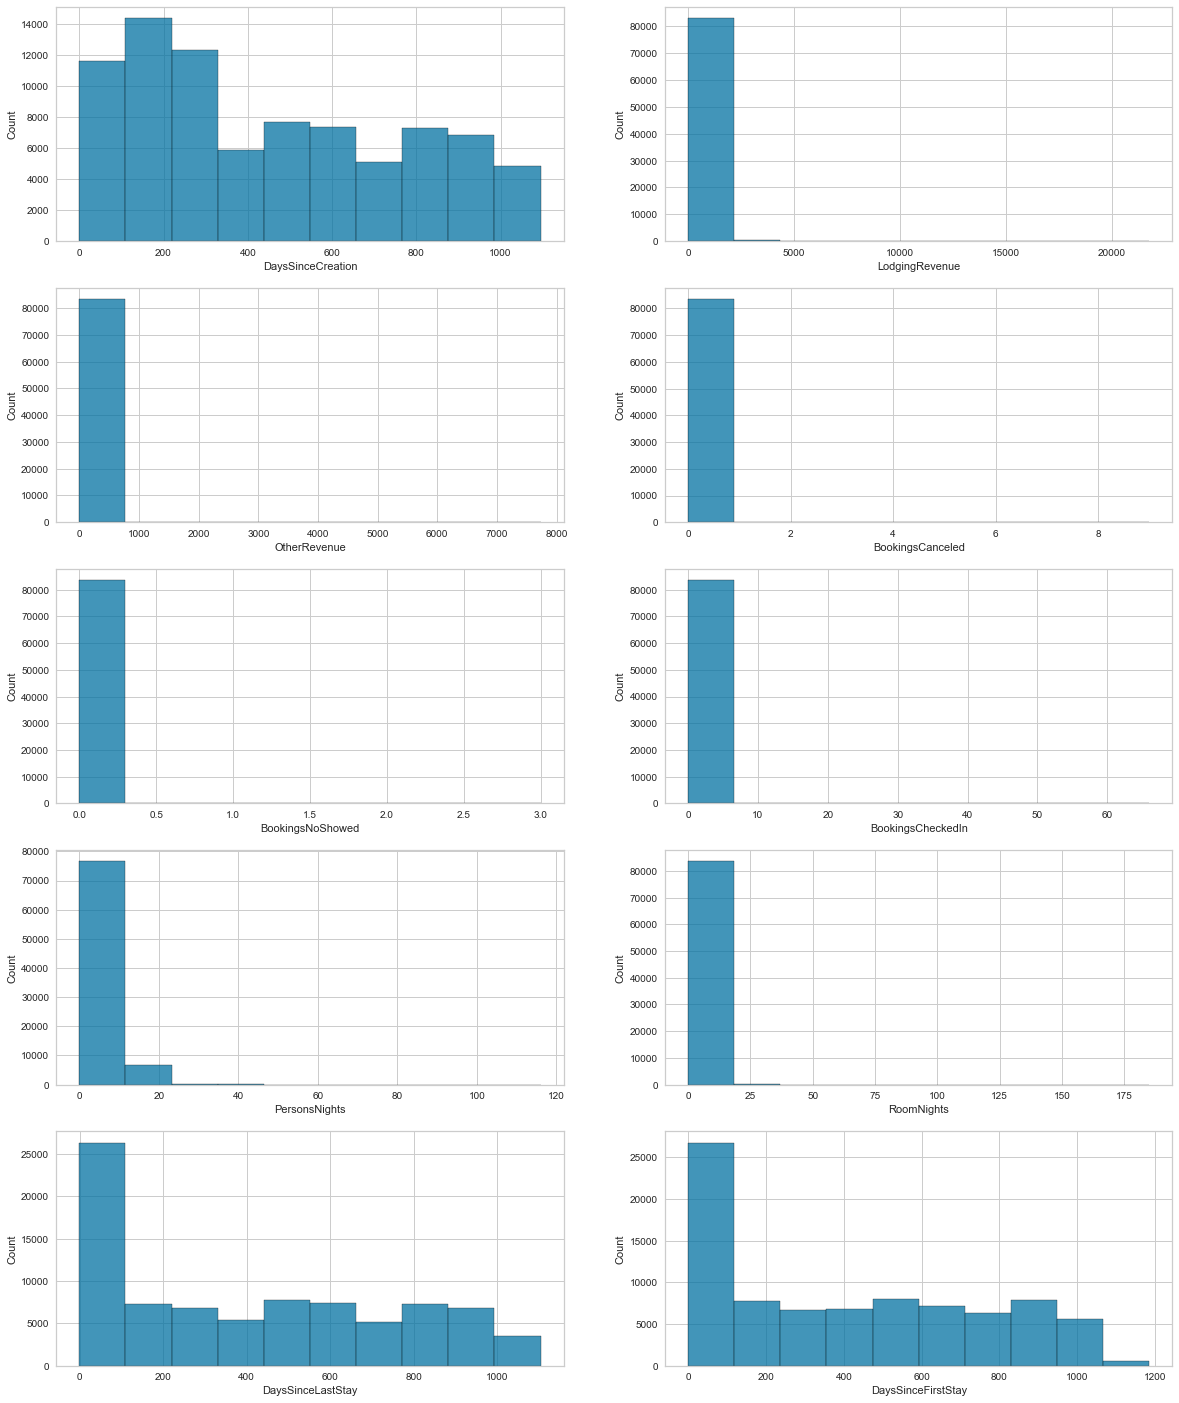

In [14]:
# visuals of the distribution of the numerical variables
fig, ax = plt.subplots(5,2 , figsize=(20,25))
for var, subplot in zip(numerical, ax.flatten()):
    g = sns.histplot(data=ds,
                    bins=10,
                    x=var,
                    ax=subplot,
                    kde=False)

- Lodging revenue, Other revenue, Bookings canceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights have outliers and should be removed, since it only corresponds to a few number of observations

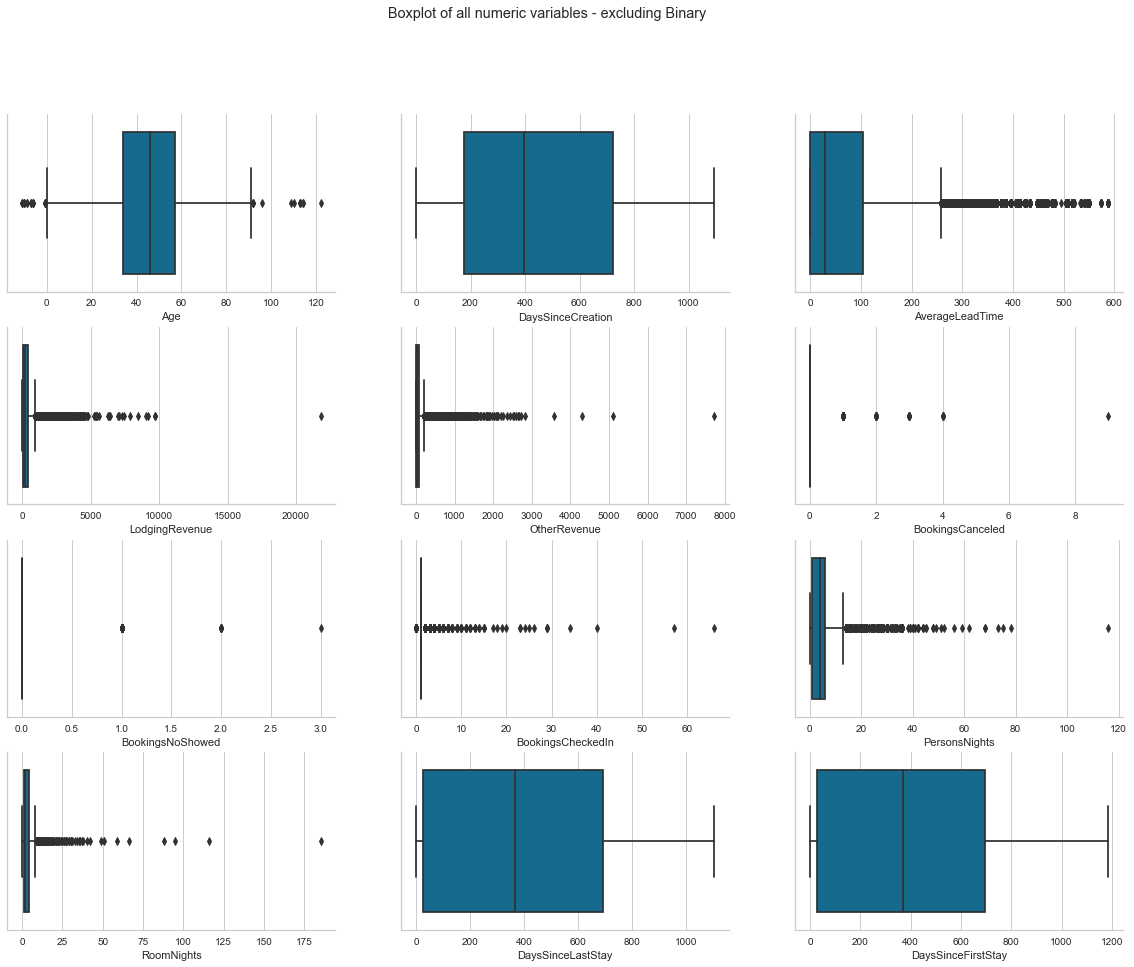

In [15]:
# HISTOGRAM (ALL NUMERIC VARIABLES - excluding binary)

cols=['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed',
     'BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay']

# Draw
fig, ax = plt.subplots(4, 3, figsize=(20,15))
for var, subplot in zip(ds[cols], ax.flatten()):
    g = sns.boxplot(data=ds,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Boxplot of all numeric variables - excluding Binary");

#### Outliers in numerical (non-binary) attributes
- Age: has observations below 0 and above 100 years.  Values below 0 are not possible so we need to drop it. Value above 100, althought possible, can harm the model, we should also drop it.
- AverageLeadTime: has observations far above the last quartile. Its unlike that someone book a hotel above 1 year in advance, so we should drop this observations.
- LodgingRevenue, OtherRevenue, RoomNights, BookingsCheckedIn and PersonsNights has outliers that are possible to exist, however to the best quality of the clustering, we will drop it.

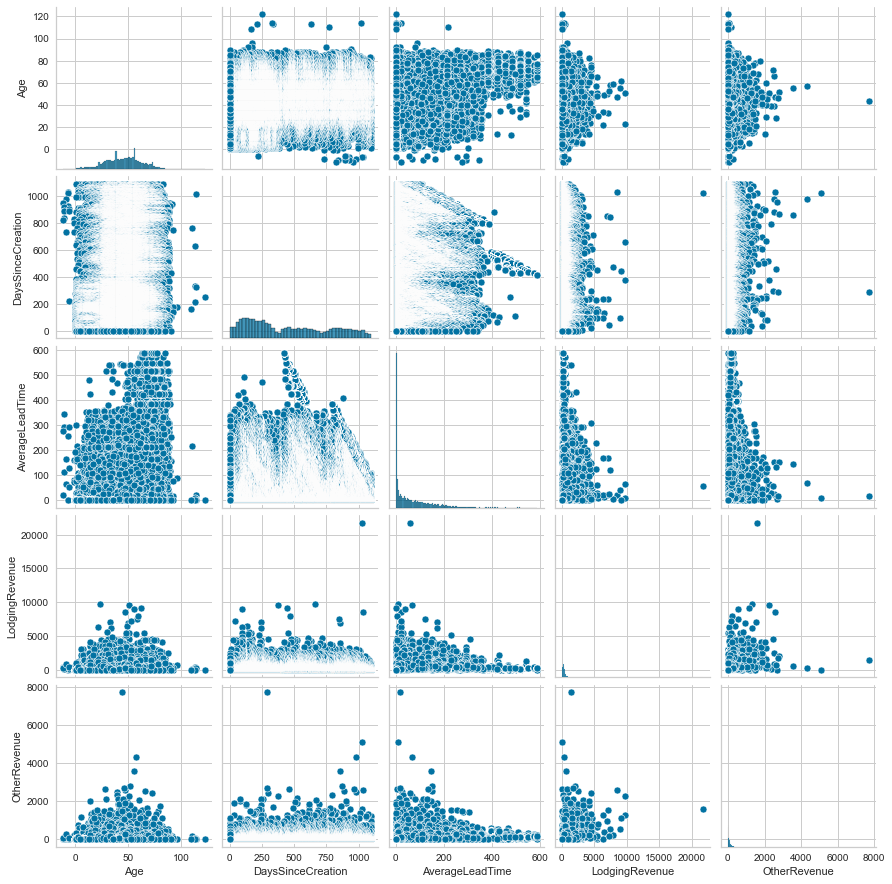

In [4]:
#Let's check some correlations between some variables related to demographic and spent behavior
cols=['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue']
g = sns.pairplot(ds[cols])

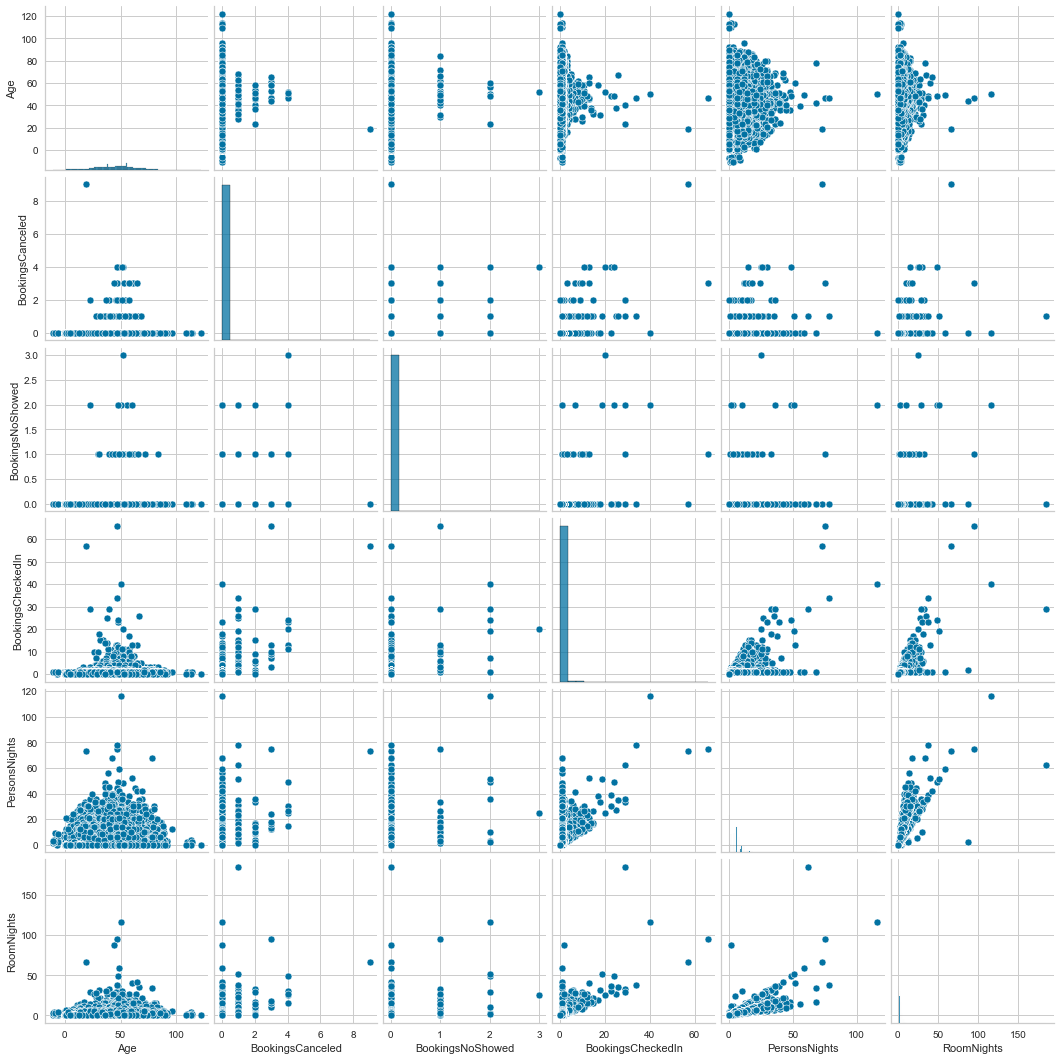

In [5]:
#Now, Let's check some correlations between some variables related the behaviour in pre and during the stay.
cols=['Age','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']
g = sns.pairplot(ds[cols])

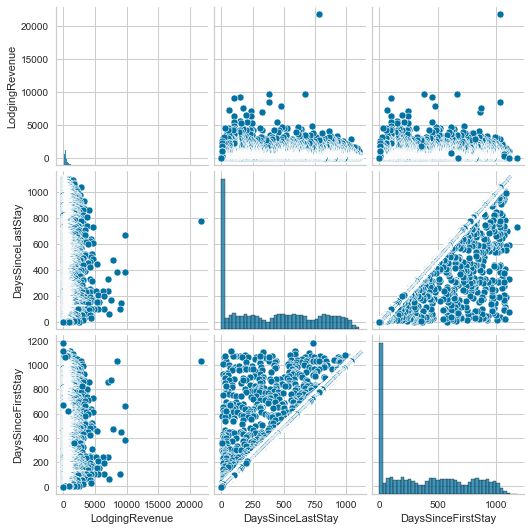

In [18]:
#Now, Let's check some correlations between some variables related the behaviour in pre and during the stay.
cols=['LodgingRevenue','DaysSinceLastStay','DaysSinceFirstStay']
g = sns.pairplot(ds[cols])

#### Insights from Pair Plot Visualization

- its quite inconclusive the visualization of correlations in the pair plot graph due to number of observations.
- Its possible to spot some outliers in almost all attributes pairs.
- we will need to check the correlation with a better in the correlation matrix

In [56]:
ds.loc[ds.LodgingRevenue < 0 ].head(100).to_csv('check_extract_minor0.csv', index = False)

<AxesSubplot:>

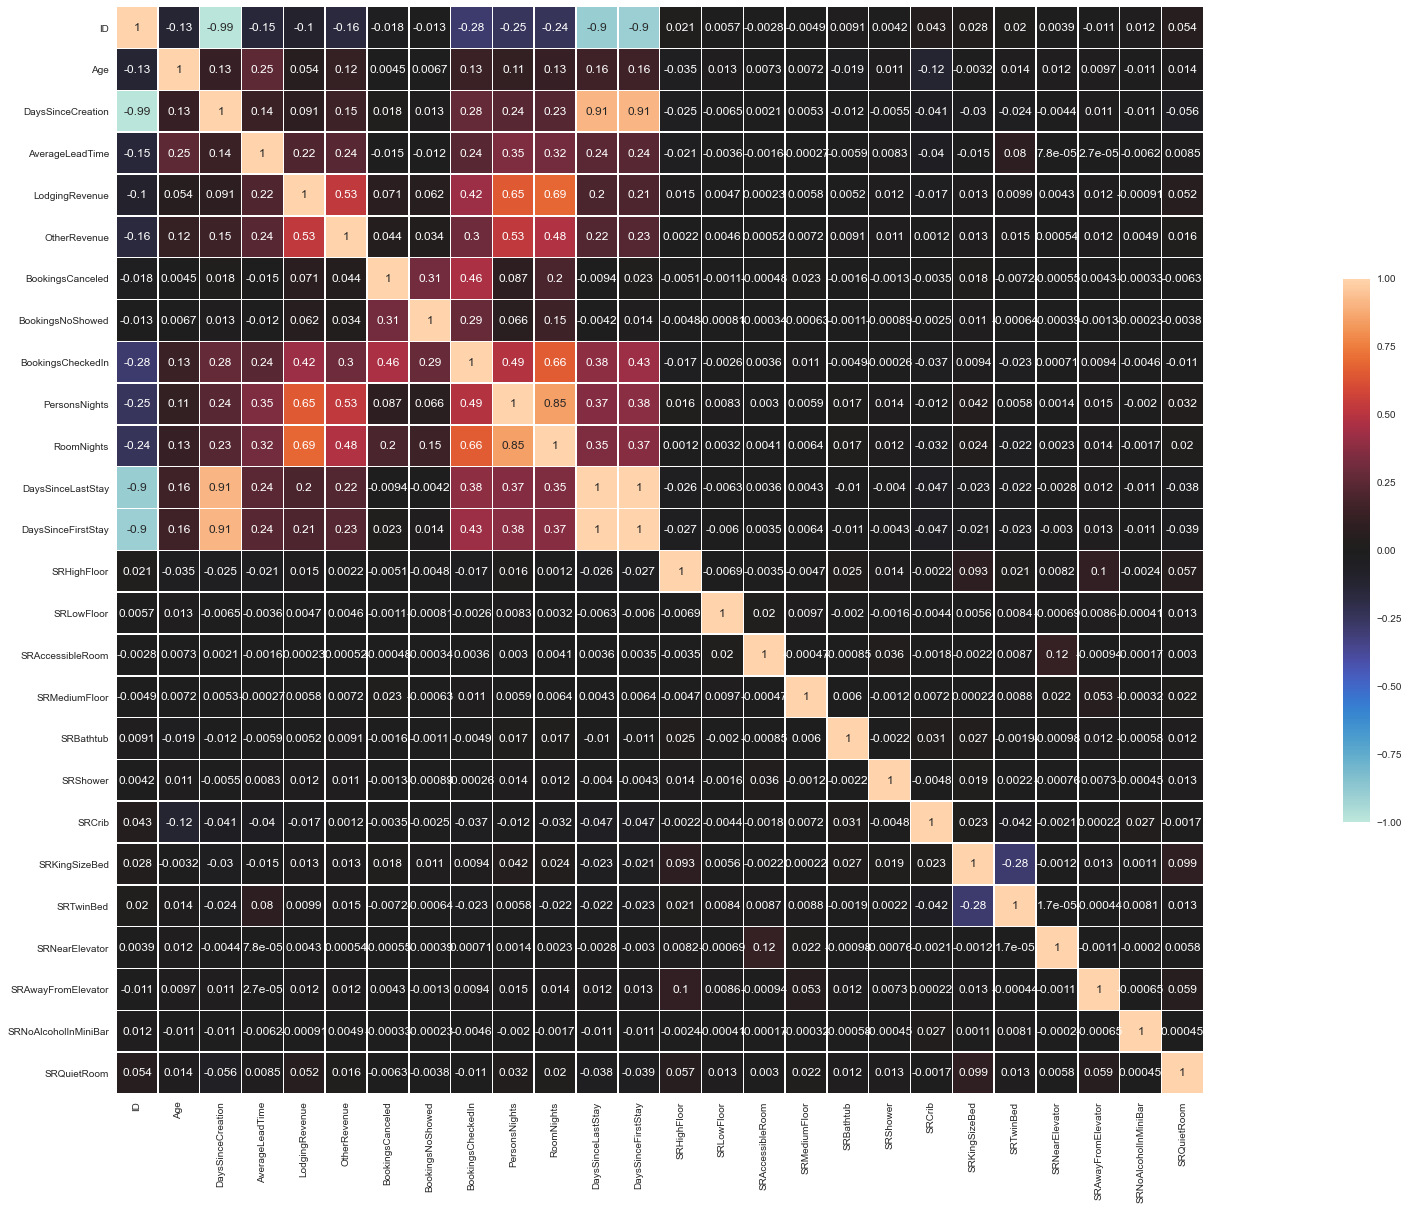

In [19]:
#Correlations

# Compute the correlation matrix
corr = ds.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



#### Insights from Correlation Matrix
- PersonNights and RoomNights have a significant correlation with Lodging revenue, which is logic since the more amount of nights, people and rooms customer have the more amount they should bill
- RoomNights also has a high positive correlation with PersonNights

### Binary Variables 

In [20]:
#Select numerical variables, leaving the binaries for later
binary = ds[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']]

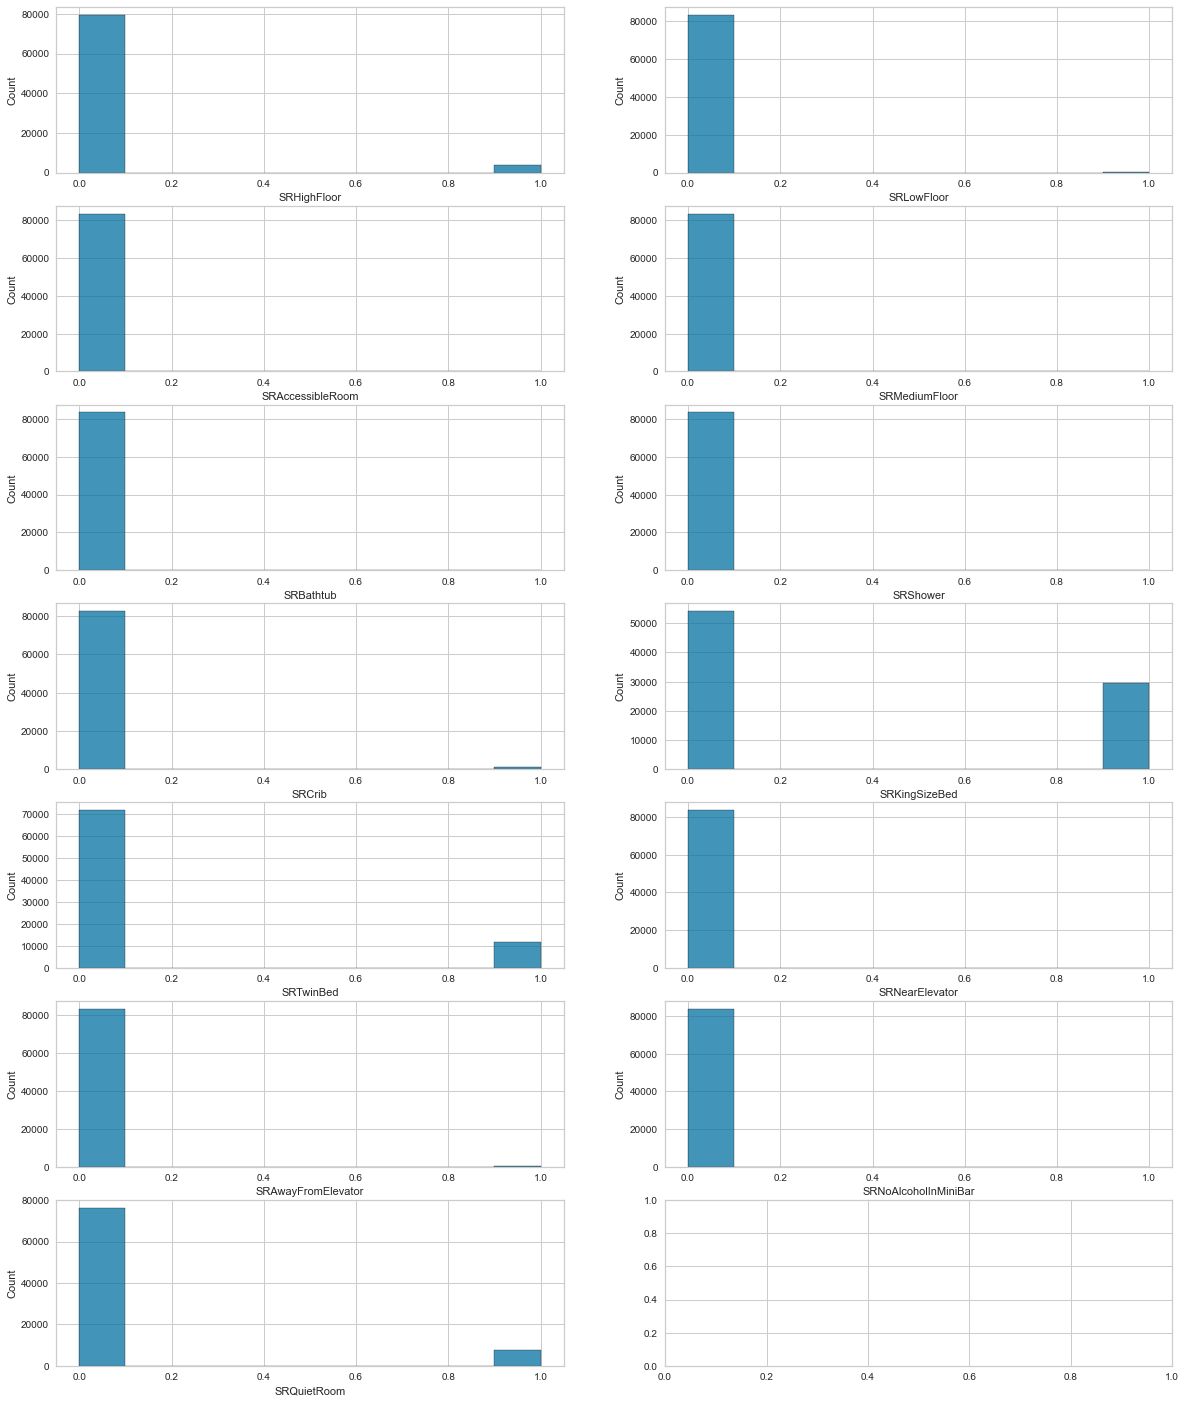

In [21]:
# visuals of the distribution of the numerical variables
fig, ax = plt.subplots(7,2 , figsize=(20,25))
for var, subplot in zip(binary, ax.flatten()):
    g = sns.histplot(data=ds,
                    bins=10,
                    x=var,
                    ax=subplot,
                    kde=False)

- The behavior is about the same for the whole dataset when we check on this variables
- From all of this variables we should only keep: SRTwinBed and SRKingSizeBed since they are more sparse.

### Suggestions for data preparation (Cami):

#### 1) Categorical variables:
- For distributionchannel, only keep travel agent and direct. Group corporate and electronic distribution under "others"
- For MarketSegment, only keep Travel agent/operator, direct and groups (about 33% of the data). Rest of the variables aggregate with "other".
- Would we like to drop market segment, considering that the most frequent class is "other", therefore we won't get any marketing insights? If we only keep distribution channel we will still keep the 2 most relevant insights from these 2 variables: People who book through travel agent + people who book directly.
- Nationality, we might want to keep for example: 75% of the dataset, and group the rest under "Others". Or we could group and bin the countries and for example put: Frequent countries, Less frequent, etc.
- Drop Name Hash and DocID Hash, since they won't be used for segmentation

#### 2) Numeric variables:
- Remove outliers from Lodging revenue, Other revenue, Bookings canceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights. Could be using Tukey method.
- We could aggregate revenue from lodging and from others and keep a total revenue
- Drop BookingsCanceled, BookingsNoShowed, BookingsCheckedIn since the values are about the same for most of the observations
- Since PersonsNight= Nights*People (Children+Adults) & RoomNights=Nights*Room. We could create a new feature= PersonsRoom=PersonsNight/RoomNights to have the amount of people per room. With this variable we could infer what are the rooms most used. Also note these 2 variables have a high correlation

 
#### 3) Zoom Binary variables:
- Drop 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom' since the values are about the same for the whole dataset

#### Recommendation for preparation (VICTOR):
- creation of Sum LodgingRevenue and OtherRevenue = totalRevenue, and dropping LodgingRevenue and OtherRevenue
- Divide TotalRevenue / RoomNights = Avg_Spend_perNight
- Agregate SRs below 1% of importance in SROthers
- Fill missing values for Age with mean - after dropping duplicates of IdHash
- Aggregate Nationality by Domestic and Foreing

# <font color='#BFD72F'>2 - Data Preparation</font> <a class="anchor" id="prep"></a>

In [198]:
#Starting creating a copy of the datasetb
ds_clean = ds.copy(deep = True)

## <font color='#BFD72F'>2.1 - Data transformation</font> <a class="anchor" id="transformation"></a>

In [199]:
#Treating categorical variables to reduce cardinality
DistributionChannel_convert = {'Electronic Distribution'   :'Other',
                                'Corporate'                :'Other',
                                'Direct'                   :'Direct',
                                'Travel Agent/Operator'    :'Travel Agent/Operator'}

ds_clean['DistributionChannel_2'] = ds_clean['DistributionChannel'].apply(lambda x : DistributionChannel_convert[x])

#Reducing Cardinality of Nationality feature to 2 categoies: Domestic and Foreing
ds_clean['Nationality'] = np.where(ds_clean['Nationality'].isin(['PRT', 'FRA', 'DEU', 'GBR', 'ESP']), "Top_EU"  , 'Other')

# imputing missing values for age with random imputation
ds_clean['Age'] = ds_clean['Age'].apply(lambda x: np.random.choice(ds_clean['Age'].dropna().values) if pd.isna(x) else x)

# remove the customers with 0 revenue, based on the data exploratin potin
# remove customers below 18 becuase they are not actionable customer for profiling

ds_clean = ds_clean.loc[# removal of minors
                        (ds_clean.Age > 18) & 
                        (ds_clean.LodgingRevenue > 0 ) & 
                        (ds_clean.DaysSinceFirstStay >= 0)]  

## <font color='#BFD72F'>2.2 - Outliers</font> <a class="anchor" id="outliers"></a>

In [200]:
# removal of outlier 

def removeOutliers (df, colList, lowPercentile=0.0025, highPercentile=0.9975, verbose=False):
    
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
        
    for name in list(df[colList].columns):
        
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
        
    return df

In [201]:
# Outliers in numerical (non-binary) attributes

outliers = ['Age','AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'RoomNights', 'BookingsCheckedIn','PersonsNights']
ds_clean = removeOutliers(ds_clean, colList=outliers , lowPercentile=0.0015, highPercentile=0.9985, verbose=True)

print(f'dataset dimensions: --> rows: {ds_clean.shape[0]} , columns: {ds_clean.shape[1]} ')

         Age  AverageLeadTime  LodgingRevenue  OtherRevenue  RoomNights  \
0.0015  19.0            0.000         53.0000           1.0         1.0   
0.9985  86.0          523.268       3145.4556        1062.0        15.0   

        BookingsCheckedIn  PersonsNights  
0.0015                1.0            1.0  
0.9985                5.0           30.0  
dataset dimensions: --> rows: 61286 , columns: 32 


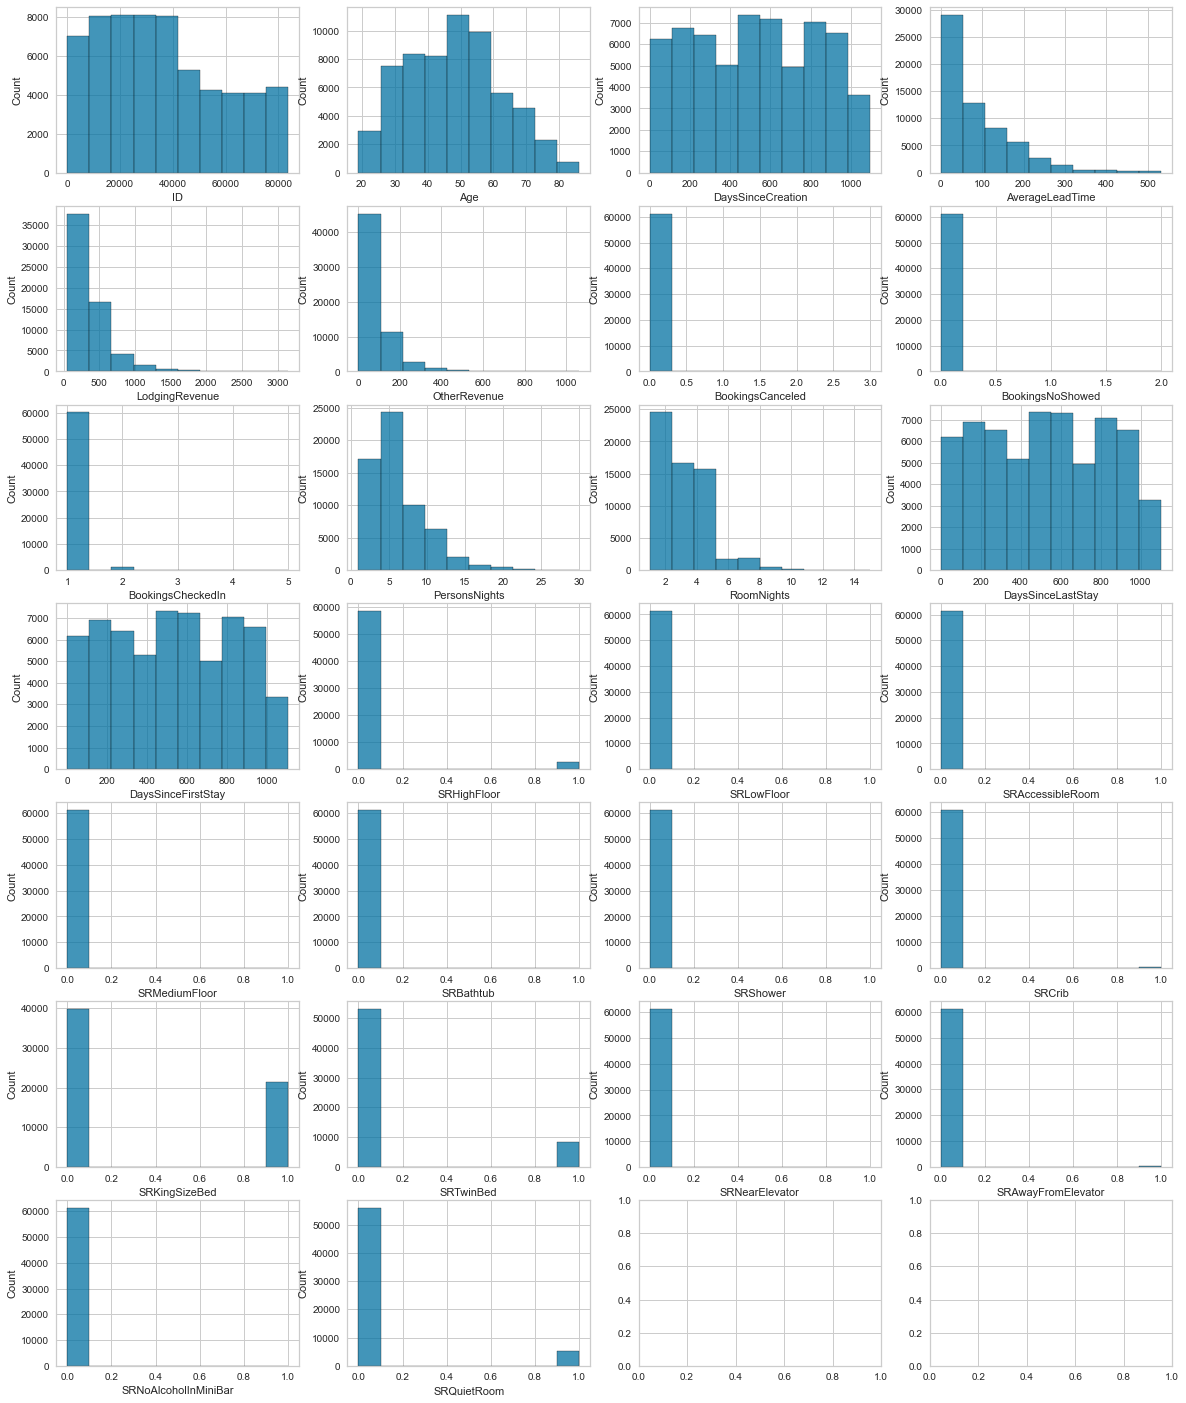

In [158]:
numerical = ds_clean.select_dtypes(include = np.number).columns.to_list()

# visuals of the distribution of the numerical variables
fig, ax = plt.subplots(7,4 , figsize=(20,25))
for var, subplot in zip(numerical, ax.flatten()):
    g = sns.histplot(data=ds_clean,
                    bins=10,
                    x=var,
                    ax=subplot,
                    kde=False)

# <font color='#BFD72F'>3 - Feature selection + engineering</font> <a class="anchor" id="features"></a>

In [202]:
# drop DocIDHash duplicates

ds_clean=ds_clean.drop_duplicates('DocIDHash')

ds_clean["TotalRevenue"] = (
    ds_clean["LodgingRevenue"] + 
    ds_clean["OtherRevenue"]
)

ds_clean["PersonsRoom"] = (
    ds_clean["PersonsNights"] / 
    ds_clean["RoomNights"]
)

ds_clean['Avg_price_PR'] = (
    ds_clean['TotalRevenue'] / 
    ds_clean['PersonsRoom']
)

ds_clean['Activity_time'] = (
    ds_clean['DaysSinceFirstStay'] 
    - ds_clean['DaysSinceLastStay']
)

# Encode categorical variables to dummy variables

cols = ['DistributionChannel_2', 'Nationality']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
ds_clean = ce_one_hot.fit_transform(ds_clean)
ds_clean_before_norm = ds_clean.copy(deep = True)
# log for skewed values 
ds_clean['AverageLeadTime'] = ds_clean['AverageLeadTime'].apply(lambda x: np.log(x+1))
ds_clean['LodgingRevenue']  = ds_clean['LodgingRevenue'].apply(lambda x: np.log(x))
ds_clean['PersonsNights']   = ds_clean['PersonsNights'].apply(lambda x: np.log(x))
ds_clean['RoomNights']      = ds_clean['RoomNights'].apply(lambda x: np.log(x))
 

#### Features to drop
- ID - irrelevant to clustering
- NameHash (after droping duplicates) - irrelevant to clustering
- DocIDHash (after droping duplicates) - irrelevant to clustering
- MarketSegment (sparse - top 3 only 33% of total)
- SRHighFloor - sames data to most obsersavtions of the dataset
- SRLowFloor - sames data to most obsersavtions of the dataset
- SRAccessibleRoom - sames data to most obsersavtions of the dataset
- SRMediumFloor - sames data to most obsersavtions of the dataset
- SRBathtub - sames data to most obsersavtions of the dataset
- SRShower - sames data to most obsersavtions of the dataset
- SRCrib - sames data to most obsersavtions of the dataset
- SRNearElevator - sames data to most obsersavtions of the dataset
- SRAwayFromElevator - sames data to most obsersavtions of the dataset
- SRNoAlcoholInMiniBar - sames data to most obsersavtions of the dataset
- SRQuietRoom - sames data to most obsersavtions of the dataset
- LodgingRevenue - high correlation with OtherRevenue - TotalRevenue Feature created
- OtherRevenue - - high correlation with LodgingRevenue - TotalRevenue Feature created
- DistributionChannel - dummy variables created after cardinality reduction
- Nationality - dummy variables created after cardinality reduction

In [203]:
ds_model = ds_clean.drop(
    columns = ['ID', 
               'NameHash',
               'DocIDHash', 
               'MarketSegment',
               'SRHighFloor', 
               'SRLowFloor', 
               'SRAccessibleRoom',
               'SRMediumFloor', 
               'SRBathtub', 
               'SRShower',
               'SRCrib',
               'SRNearElevator',
               'SRAwayFromElevator', 
               'SRNoAlcoholInMiniBar', 
               'SRQuietRoom',
               'LodgingRevenue',
               'OtherRevenue',
               'DistributionChannel',
               'Nationality_Other',
               'DistributionChannel_2_Direct',
               'BookingsNoShowed',
               'PersonsRoom'

              ])

In [204]:
# Scaling between - 1 and 1 all the numeric variables 

minmax = preprocessing.MinMaxScaler(feature_range = (-1,1))
ds_model = pd.DataFrame(minmax.fit_transform(ds_model.values), columns=ds_model.columns,index=ds_model.index)


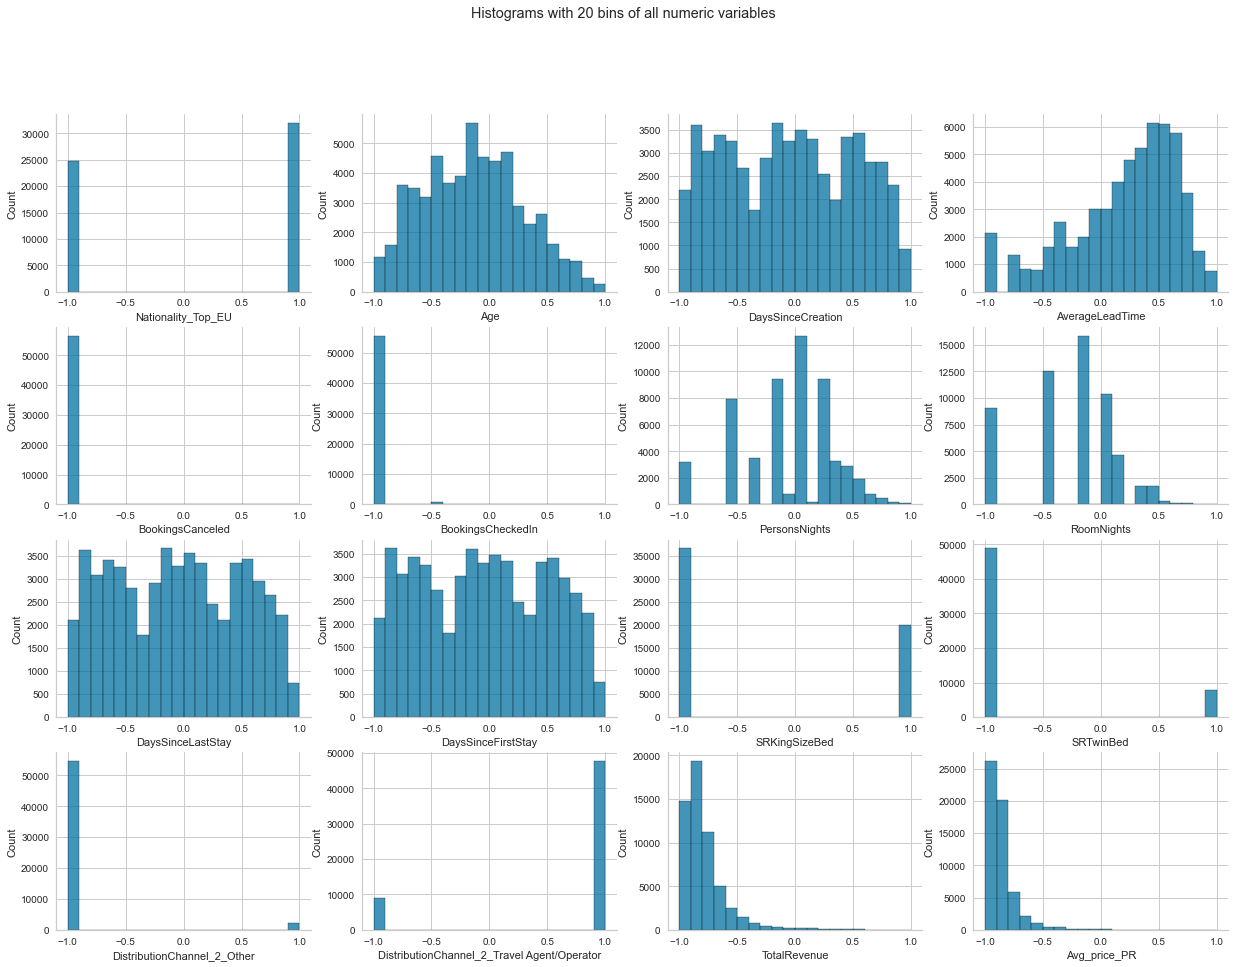

In [164]:
# Draw
fig, ax = plt.subplots(4, 4, figsize=(21,15))
for var, subplot in zip(ds_model, ax.flatten()):
    g = sns.histplot(data=ds_model,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Histograms with 20 bins of all numeric variables");

In [117]:
def correlation_heatmap(ds, method ):
    numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
    corr = ds[numerical].corr(method=method)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)]= True

    # Draw
    fig , ax = plt.subplots(figsize=(12, 15))
    heatmap = sns.heatmap(corr,
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = 'coolwarm',
                        cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                        fmt='.4f',
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        )

    # Decoration
    plt.title("Spearman correlation between numeric variables")
    ax.set_yticklabels(corr.columns, rotation = 0)
    ax.set_xticklabels(corr.columns, rotation = 45)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


correlation_heatmap(ds_model, 'spearman')

# <font color='#BFD72F'>4 - Models + evaluation</font> <a class="anchor" id="models"></a>

In [123]:
# SVD to treat the sparse matrix

pca2 = TruncatedSVD(n_components = 5)
pca2.fit(ds_model)
X_pca2 = pca2.transform(ds_model)
print(X_pca2.shape)


(56698, 5)


/var/folders/tq/sy_s9jc96zj8wmk_td48vkn00000gn/T/ipykernel_31470/195496036.py:7: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



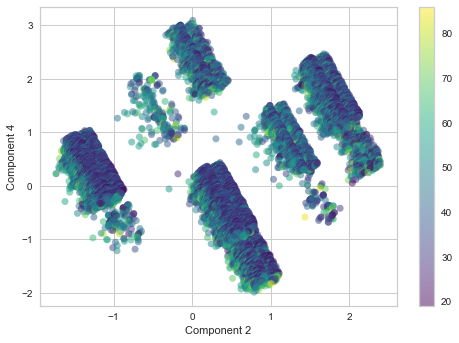

In [128]:

component1 = 2
component2 = 4
# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, component1], X_pca2[:, component2], c=ds_clean.Age, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component ' + str(component1))
plt.ylabel('Component ' + str(component2))
plt.colorbar();
# what about the LDA?



In [165]:
# fit PCA to dataset 
pca_trunc = TruncatedSVD(n_components= len(ds_model.columns)-1).fit(ds_model)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca_trunc.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(ds_model.columns)),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca_trunc.explained_variance_ratio_)})
pcaDF

Component Variance explained  Cumulative variance explained
0           1           0.030422                       0.030422
1           2           0.223343                       0.253765
2           3           0.204998                       0.458763
3           4           0.180473                       0.639236
4           5           0.126414                       0.765650
5           6           0.074060                       0.839710
6           7           0.059293                       0.899003
7           8           0.041420                       0.940423
8           9           0.029613                       0.970036
9          10           0.018420                       0.988456
10         11           0.005747                       0.994203
11         12           0.004070                       0.998272
12         13           0.000909                       0.999182
13         14           0.000452                       0.999634
14         15           0.000328                       0.999961
15         16           0.000026                       0.999987

Text(0, 0.5, 'Variance explained')

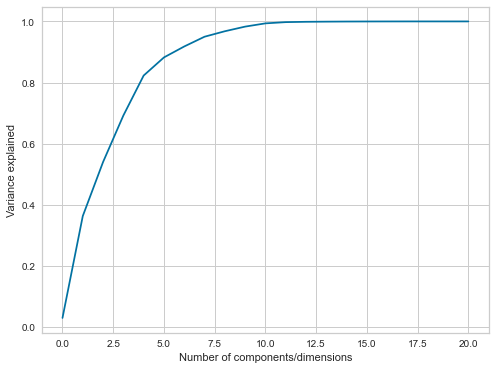

In [130]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(8, 6))
plt.plot(np.cumsum(pca_trunc.explained_variance_ratio_))

# Decoration

plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')

# 8 components seems to be more than enough

In [209]:

pca_reduced = TruncatedSVD(n_components = 9)

pca_reduced.fit(ds_model)
X_pca_reduced = pca_reduced.transform(ds_model) 
print(X_pca_reduced.shape)


(56698, 9)


### <font color='#BFD72F'>4.2.2 - Kmeans</font> <a class="anchor" id="models"></a>

In [167]:
# Apply the Elbow method to select K
km = KMeans(init='k-means++', n_init=10, max_iter=300, random_state=123)

visualizer = KElbowVisualizer(km, k=(1,10), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show() 

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Select K based on the sum of squared distances - Elbow method
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(K, ssd, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.rc('axes')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Elbow method - Reduced dimensionality');

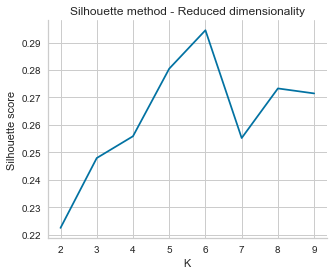

In [168]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

for k in range(2, 10):
  km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=123).fit(ds_model)
  labels = km.labels_
  sil.append(silhouette_score(ds_model, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 10), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality');

In [211]:
# Apply the K-Means for K=4
K=6
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

In [184]:
# Visualize Silhouette 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 56701 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [191]:
# Plot clusters cardinality 

def cluster_cardinality(ds,y_kmeans):
    # to be applied to before normalization dataset
    # Count observations per cluster
    freqByCluster = ds.groupby(y_kmeans).size()

    # Draw
    fig, ax = plt.subplots(figsize=(7,5))
    g = sns.countplot(x=y_kmeans, color='grey')

    # Decoration
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    for index,data in enumerate(freqByCluster):
        plt.text(x=index-0.2 , y=data+50 , s=f"{data}" )
    sns.despine()
    plt.title("Cluster cardinality")
    plt.xlabel("Cluster")
    plt.ylabel("Frequency in cluster")
    plt.rc('axes')

In [192]:
# Plot clusters magnitude
def cluster_magnitude(allDistances, ds2, y_kmeans):
    # Compute Magnitude
    ds2['distanceToCentroid'] = np.min(allDistances,axis=1)
    magnitude = ds2['distanceToCentroid'].groupby(y_kmeans).sum()
    X = ds2.drop(columns=['distanceToCentroid'])

    # Draw
    fig, ax = plt.subplots(figsize=(7,5))
    g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

    # Decoration
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    for index,data in enumerate(magnitude):
        plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" )
    sns.despine()
    plt.title("Cluster magnitude")
    plt.xlabel("Cluster")
    plt.ylabel("Sum of distances to centroid")
    plt.rc('axes')

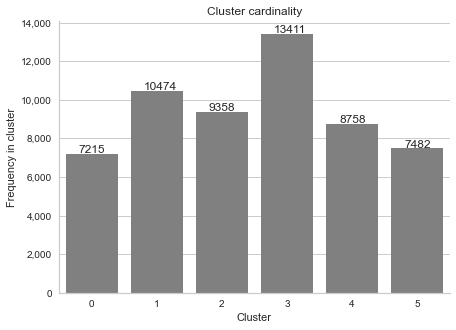

In [214]:
cluster_cardinality(ds_clean,y_kmeans)

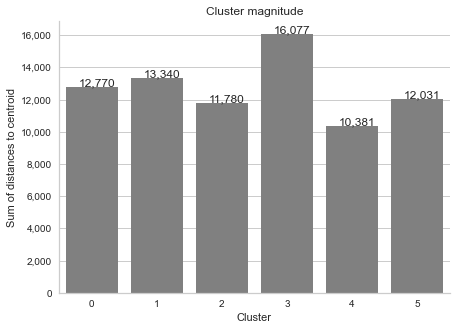

In [215]:
cluster_magnitude(allDistances, ds_clean, y_kmeans)

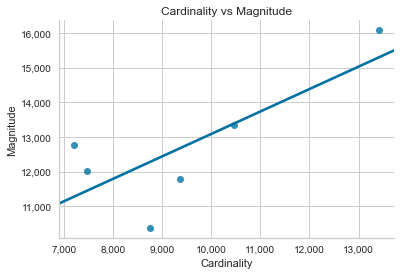

In [216]:
# Plot cardinality vs magnitude

# Draw
freqByCluster = ds_clean.groupby(y_kmeans).size()
magnitude = ds_clean['distanceToCentroid'].groupby(y_kmeans).sum()

fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude")
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes')

In [213]:
ds_clean['cluster'] = pd.Series(y_kmeans, index=ds_clean.index)
# get the original data set
full_db = ds_clean_before_norm.merge(ds_clean['cluster'], how = 'inner', left_index= True, right_index = True)
full_db.columns
full_db.groupby(by = 'cluster').mean().T

cluster                                                 0             1  \
ID                                           37805.994456  34819.692381   
Nationality_Top_EU                               0.565211      1.000000   
Nationality_Other                                0.434789      0.000000   
Age                                             46.370201     47.211858   
DaysSinceCreation                              503.744976    540.385335   
AverageLeadTime                                 55.367429     89.957418   
LodgingRevenue                                 393.869436    388.667962   
OtherRevenue                                    79.852683     92.641732   
BookingsCanceled                                 0.003881      0.000382   
BookingsNoShowed                                 0.001940      0.000000   
BookingsCheckedIn                                1.059598      1.018999   
PersonsNights                                    5.156480      6.470212   
RoomNights                                       2.753015      3.156005   
DaysSinceLastStay                              499.384754    541.741741   
DaysSinceFirstStay                             506.640748    543.434504   
SRHighFloor                                      0.027443      0.080103   
SRLowFloor                                       0.001247      0.001432   
SRAccessibleRoom                                 0.000277      0.000095   
SRMediumFloor                                    0.001247      0.000764   
SRBathtub                                        0.002772      0.004869   
SRShower                                         0.002356      0.003819   
SRCrib                                           0.014276      0.012030   
SRKingSizeBed                                    0.025225      1.000000   
SRTwinBed                                        0.025918      0.006779   
SRNearElevator                                   0.000416      0.000382   
SRAwayFromElevator                               0.004435      0.004678   
SRNoAlcoholInMiniBar                             0.000000      0.000095   
SRQuietRoom                                      0.024116      0.133378   
DistributionChannel_2_Other                      0.280111      0.000000   
DistributionChannel_2_Travel Agent/Operator      0.000000      0.926580   
DistributionChannel_2_Direct                     0.719889      0.073420   
TotalRevenue                                   473.722119    481.309694   
PersonsRoom                                      1.805326      2.018225   
Avg_price_PR                                   287.596497    250.187934   
Activity_time                                    7.255994      1.692763   

cluster                                                 2             3  \
ID                                           38621.865356  34368.136231   
Nationality_Top_EU                               0.000000      1.000000   
Nationality_Other                                1.000000      0.000000   
Age                                             47.699188     48.590858   
DaysSinceCreation                              492.189891    547.976064   
AverageLeadTime                                 85.862471     94.459175   
LodgingRevenue                                 415.716744    350.010148   
OtherRevenue                                    88.214467     84.137260   
BookingsCanceled                                 0.000855      0.000149   
BookingsNoShowed                                 0.000107      0.000075   
BookingsCheckedIn                                1.022013      1.010663   
PersonsNights                                    6.653238      6.032212   
RoomNights                                       3.261274      3.137648   
DaysSinceLastStay                              494.472964    550.538811   
DaysSinceFirstStay                             495.396025    551.089330   
SRHighFloor                                      0.069032      0.019984   
SRLowFloor              

In [207]:
print(ds_clean_before_norm.shape, ds_clean.shape)


(56698, 39) (56698, 39)
